<a href="https://colab.research.google.com/github/Soumyajit567/Twitter_Analysis_for_Class_Imbalance/blob/master/Without_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from textblob import TextBlob
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Coronavirus')
for tweets in public_tweets:
    print(tweets.text)
    analysis = TextBlob(tweets.text)
    print(analysis.sentiment)

Coronavirus:sindaco Orgosolo chiude bar e ristoranti alle 22. Due nuovi positivi Gavoi, Municipio off limits #ANSA https://t.co/lpuwXoE878
Sentiment(polarity=-0.125, subjectivity=0.375)
RT @donmoyn: The USPS had a plan to send 5 reusable facemarks to every household in early April. Even had a press release ready.

The White…
Sentiment(polarity=0.15000000000000002, subjectivity=0.4)
RT @StillDelvingH: Man ”took the afternoon off work unpaid to make a 100-mile round trip to a site on an out-of-town business park but foun…
Sentiment(polarity=0.0, subjectivity=0.4)
RT @gavinesler: Ooops - it appears that some of us peasants have annoyed Mr Rees-Mogg by suggesting that after 7 months of coronavirus prom…
Sentiment(polarity=-0.4, subjectivity=0.8)
RT @prodigalbum: Dido Harding is saying that no-one could have foreseen the increase in demand for coronavirus testing.

During a pandemic.…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @BBCWorld: Latest data from the World Health Organization show

In [2]:
def get_tweet_sentiment(self, tweet):
   # create TextBlob object of passed tweet text
   analysis = TextBlob(self.trim_tweet(tweet))
   # set sentiment
   if analysis.sentiment.polarity > 0:
      return 'positive'
   elif analysis.sentiment.polarity == 0:
      return 'neutral'
   else:
      return 'negative'
print(get_tweet_sentiment)

<function get_tweet_sentiment at 0x7fcb0a0868c8>


In [3]:
from plotly import __version__
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [5]:
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'

In [6]:

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [7]:

import tweepy as tw
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings
warnings.filterwarnings("ignore")

In [8]:

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
search_term = "#coronavirus+covid+india -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-06-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['After Spotting “Covid-Positive” Passengers, Air India Flights Suspended In Dubai\n#AirIndia #Covid19 #Coronavirus… https://t.co/Oz1eTO0DFI',
 '🔷A retired virologist says that India is undercounting covid deaths.\n🔷The debate about attack on dissent continues… https://t.co/lD6VLcGvBK',
 'The Indian Medical Association (IMA) has accused the Centre of showing indifference to the contribution of doctors… https://t.co/ewWjuIkfR3',
 'The Indian Medical Association provided the list of doctors after MoHFW said it had no data on health workers who d… https://t.co/ZJibGtai6O',
 'Maharashtra Energy Minister Nitin Raut on Friday tested positive for COVID-19......#minister #energyminister… https://t.co/0SsRu8x8wa']

In [9]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [10]:

all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['After Spotting CovidPositive Passengers Air India Flights Suspended In DubaiAirIndia Covid19 Coronavirus',
 'A retired virologist says that India is undercounting covid deathsThe debate about attack on dissent continues',
 'The Indian Medical Association IMA has accused the Centre of showing indifference to the contribution of doctors',
 'The Indian Medical Association provided the list of doctors after MoHFW said it had no data on health workers who d',
 'Maharashtra Energy Minister Nitin Raut on Friday tested positive for COVID19minister energyminister']

In [11]:
import pandas as pd
# Note how capitalization impacts unique returned values
ex_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Get unique elements in the list
set(ex_list)

{'COVID 19', 'Corona', 'Coronavirus', 'corona', 'coronavirus', 'covid 19'}

In [12]:
# Note how capitalization impacts unique returned values
words_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case

['coronavirus', 'covid 19', 'coronavirus', 'covid 19', 'corona', 'corona']

**Bag of Words**

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from google.colab import drive
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [14]:
set(lower_case)

{'corona', 'coronavirus', 'covid 19'}

In [15]:
all_tweets_no_urls[0].split()

['After',
 'Spotting',
 'CovidPositive',
 'Passengers',
 'Air',
 'India',
 'Flights',
 'Suspended',
 'In',
 'DubaiAirIndia',
 'Covid19',
 'Coronavirus']

In [16]:

# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['after',
  'spotting',
  'covidpositive',
  'passengers',
  'air',
  'india',
  'flights',
  'suspended',
  'in',
  'dubaiairindia',
  'covid19',
  'coronavirus'],
 ['a',
  'retired',
  'virologist',
  'says',
  'that',
  'india',
  'is',
  'undercounting',
  'covid',
  'deathsthe',
  'debate',
  'about',
  'attack',
  'on',
  'dissent',
  'continues']]

In [17]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('covid19', 554),
 ('india', 496),
 ('coronavirus', 455),
 ('the', 424),
 ('in', 408),
 ('cases', 406),
 ('of', 374),
 ('to', 288),
 ('covid', 228),
 ('a', 158),
 ('for', 145),
 ('and', 130),
 ('new', 125),
 ('indias', 118),
 ('with', 103)]

In [18]:

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,covid19,554
1,india,496
2,coronavirus,455
3,the,424
4,in,408


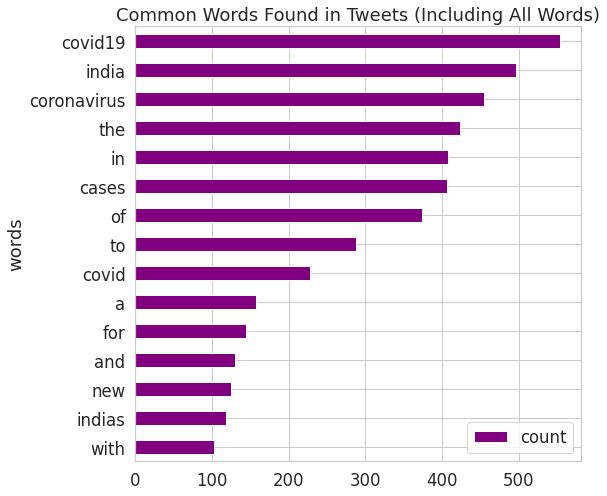

In [19]:

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [20]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:

stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['is', 'then', 'they', 'needn', 'all', 'more', 'isn', 'wasn', 'i', 'same']

In [22]:

words_in_tweet[0]

['after',
 'spotting',
 'covidpositive',
 'passengers',
 'air',
 'india',
 'flights',
 'suspended',
 'in',
 'dubaiairindia',
 'covid19',
 'coronavirus']

In [23]:
for all_words in words_in_tweet:
    for a_word in all_words:
        # remove stop words
        # Remove stop words from each tweet list of words
     tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['spotting',
 'covidpositive',
 'passengers',
 'air',
 'india',
 'flights',
 'suspended',
 'dubaiairindia',
 'covid19',
 'coronavirus']

In [24]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('covid19', 554),
 ('india', 496),
 ('coronavirus', 455),
 ('cases', 406),
 ('covid', 228),
 ('new', 125),
 ('indias', 118),
 ('tally', 94),
 ('vaccine', 90),
 ('corona', 83),
 ('deaths', 79),
 ('lakh', 79),
 ('million', 75),
 ('updates', 75),
 ('china', 63)]

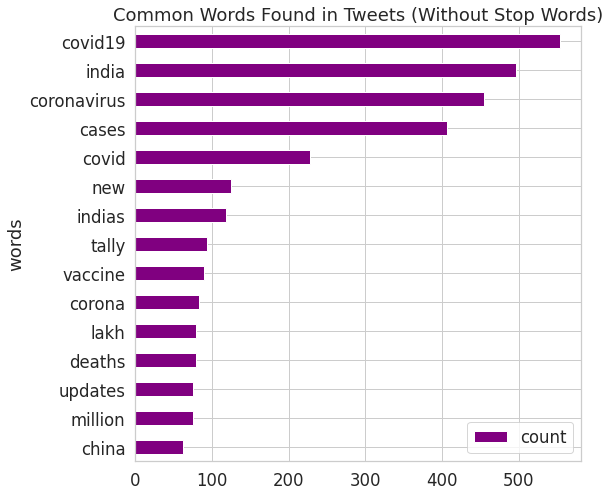

In [25]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [26]:
collection_words = ['covid 19', 'coronavirus', 'india']

In [27]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [28]:
tweets_nsw_nc[0]

['spotting',
 'covidpositive',
 'passengers',
 'air',
 'flights',
 'suspended',
 'dubaiairindia',
 'covid19']

In [29]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('covid19', 554),
 ('cases', 406),
 ('covid', 228),
 ('new', 125),
 ('indias', 118),
 ('tally', 94),
 ('vaccine', 90),
 ('corona', 83),
 ('deaths', 79),
 ('lakh', 79),
 ('million', 75),
 ('updates', 75),
 ('china', 63),
 ('19', 60),
 ('positive', 55)]

In [30]:
len(counts_nsw_nc)

3192

In [31]:

clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,covid19,554
1,cases,406
2,covid,228
3,new,125
4,indias,118


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
clean_tweets_ncw.describe()

,count
count,15.00000
mean,145.60000
std,144.77707
min,55.00000
25%,75.00000
50%,83.00000
75%,121.50000
max,554.00000


In [34]:

clean_tweets_ncw.columns=['covid19','cases']

In [35]:
clean_tweets_ncw.head()

,covid19,cases
0,covid19,554
1,cases,406
2,covid,228
3,new,125
4,indias,118


In [36]:

clean_tweets_ncw.shape

(15, 2)

In [37]:
clean_tweets_ncw.columns

Index(['covid19', 'cases'], dtype='object')

In [38]:
clean_tweets_ncw.dtypes

covid19    object
cases       int64
dtype: object

In [39]:

clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [40]:
tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
covid19,object,0,15
cases,int64,0,13


In [41]:
clean_tweets_ncw.drop_duplicates()

,covid19,cases
0,covid19,554
1,cases,406
2,covid,228
3,new,125
4,indias,118
5,tally,94
6,vaccine,90
7,corona,83
8,deaths,79
9,lakh,79


In [42]:
clean_tweets_ncw['covid19'].fillna(value=(clean_tweets_ncw['cases'].mean()),inplace=True)

In [43]:
clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [44]:
clean_tweets_ncw=pd.get_dummies(clean_tweets_ncw)

In [45]:
clean_tweets_ncw.head()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_positive,covid19_tally,covid19_updates,covid19_vaccine
0,554,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,406,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,228,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,125,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:

clean_tweets_ncw.isnull().values.any()

clean_tweets_ncw.shape

(15, 16)

In [47]:
clean_tweets_ncw.head()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_positive,covid19_tally,covid19_updates,covid19_vaccine
0,554,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,406,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,228,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,125,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0



**Bag of words**

We’ll define a collection of strings called a corpus. Then we’ll use the CountVectorizer to create vectors from the corpus.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

#corpus = all_tweets_no_urls[:5]
corpus = all_tweets_no_urls[:5]

vectorizer = CountVectorizer()
print( vectorizer.fit_transform(corpus).todense() )
print( vectorizer.vocabulary_ )

[[0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0
  0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 3 1 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1
  0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 2 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
  1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
{'after': 2, 'spotting': 52, 'covidpositive': 13, 'passengers': 44, 'air': 3, 'india': 30, 'flights': 22, 'suspended': 53, 'in': 29, 'dubaiairindia': 19, 'covid19': 11, 'coronavirus': 9, 'retired': 48, 'virologist': 59, 'says': 50, 'that': 55, 'is': 33, 'undercounting': 58, 'covid': 10, 'deathsthe': 15, 'debate': 16, 'about': 0, 'attack': 5, 'on': 43, 

In [49]:
clean_tweets_ncw.all_tweets_no_urls=['covid19','cases']

In [50]:

tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
cases,int64,0,13
covid19_19,uint8,0,2
covid19_cases,uint8,0,2
covid19_china,uint8,0,2
covid19_corona,uint8,0,2
covid19_covid,uint8,0,2
covid19_covid19,uint8,0,2
covid19_deaths,uint8,0,2
covid19_indias,uint8,0,2
covid19_lakh,uint8,0,2



**KNN**

In [51]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
clean_tweets_ncw.drop_duplicates()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_positive,covid19_tally,covid19_updates,covid19_vaccine
0,554,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,406,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,228,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,125,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,94,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,79,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,79,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#standardScaler = StandardScaler()
#columns_to_scale = ['cases', 'covid19_cases', 'covid19_deaths' , 'covid19_new']
#clean_tweets_ncw[columns_to_scale] = standardScaler.fit_transform(clean_tweets_ncw[columns_to_scale])

In [54]:
X = clean_tweets_ncw.iloc[:, :-1].values
#X=np.asarray(clean_tweets_ncw['cases'], dtype="|S6")
y = np.asarray(clean_tweets_ncw['cases'], dtype="|S2")
#y= clean_tweets_ncw.iloc[:, 4].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
random_state=42) 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
pred =  knn.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]


In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       b'12'       0.00      0.00      0.00         0
       b'55'       0.00      0.00      0.00         1
       b'60'       0.00      0.00      0.00         1
       b'75'       0.50      1.00      0.67         1
       b'79'       0.00      0.00      0.00         1
       b'94'       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.08      0.17      0.11         5
weighted avg       0.10      0.20      0.13         5




**Choosing a K Value**

Let’s go ahead and use the elbow method to pick a good K Value. We will basically check the error rate for k=1 to say k=40. For every value of k we will call KNN classifier and then choose the value of k which has the least error rate.

In [66]:

error_rate = []
# Might take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

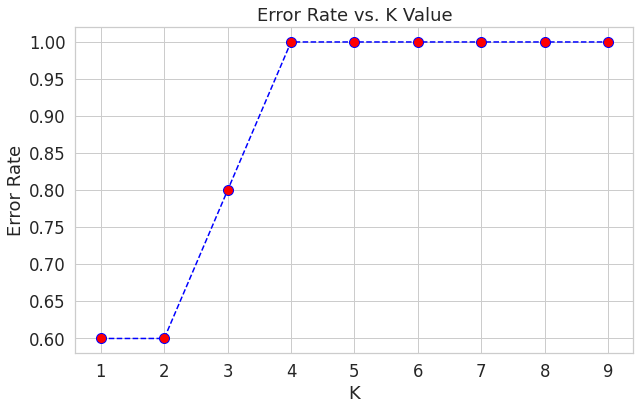

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [69]:
data = pd.get_dummies(clean_tweets_ncw)
data.iloc[0]

cases               554
covid19_19            0
covid19_cases         0
covid19_china         0
covid19_corona        0
covid19_covid         0
covid19_covid19       1
covid19_deaths        0
covid19_indias        0
covid19_lakh          0
covid19_million       0
covid19_new           0
covid19_positive      0
covid19_tally         0
covid19_updates       0
covid19_vaccine       0
Name: 0, dtype: int64

In [70]:
data.covid19_cases.value_counts()

0    14
1     1
Name: covid19_cases, dtype: int64

In [71]:
data = data[~data.cases.isnull()]

**Random Forest**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf=RandomForestClassifier(random_state=56)

In [75]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=56, verbose=0,
                       warm_start=False)

In [76]:
clf.score(X_train,y_train)

1.0

In [77]:
test_predict=clf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(test_predict,y_test)

0.0

In [80]:
from sklearn.metrics import precision_score, f1_score, classification_report

In [82]:

#precision_score(test_predict,y_test)
print("Precision Score : ",precision_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.0


In [83]:
#recall_score(test_predict,y_test)
print("Recall Score : ",recall_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.0


In [84]:
print("F1 Score : ",f1_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

F1 Score :  0.0


**Naive Bayes**

In [85]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [86]:
gnb = BernoulliNB()

In [87]:
gnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [88]:
test_predict=gnb.predict(X_test)

In [89]:

accuracy_score(test_predict,y_test)

0.0

In [91]:
#precision_score(test_predict,y_test)
print("Precision Score : ",precision_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.0


In [92]:
print("Recall Score : ",recall_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.0


In [93]:
print("F1 Score : ",f1_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

F1 Score :  0.0


**Decision Tree Classifier**

In [94]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [95]:

model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.0

In [98]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix( test_predict,y_test)
)

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,0,1
5,0,0,0,0,0,0


In [99]:
print("Precision Score : ",precision_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.0


In [100]:
print("Recall Score : ",recall_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.0


In [101]:

print("f1 Score : ",f1_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

f1 Score :  0.0
